In [1]:
# import the library
%matplotlib inline

import pandas as pd
import numpy as np
import collections
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import euclidean_distances

sns.set_style('whitegrid')


# Load Data

In [4]:
tracks = pd.read_csv('../../data/processed/tracks_processed.csv', dtype=object)
tracks = tracks.set_index(['track_year_created'])

tracks.head()

,Unnamed: 0,track_id,album_date_created,album_date_released,album_favorites,album_id,album_listens,album_tags,album_title,album_tracks,...,track_genres,track_genres_all,track_interest,track_language_code,track_listens,track_number,track_title,bit_rate_factor,interest_factor,track_price
track_year_created,,,,,,,,,,,,,,,,,,,,,
2008,0,2,2008-11-26 1:44,2009-01-05 0:00,4,1,6073,[],AWOL - A Way Of Life,7,...,[21],[21],4656,en,1293,3,Food,0.57,1.0,1.7
2008,1,3,2008-11-26 1:44,2009-01-05 0:00,4,1,6073,[],AWOL - A Way Of Life,7,...,[21],[21],1470,en,514,4,Electric Ave,0.57,1.0,1.7
2008,2,5,2008-11-26 1:44,2009-01-05 0:00,4,1,6073,[],AWOL - A Way Of Life,7,...,[21],[21],1933,en,1151,6,This World,0.57,1.0,1.7
2008,3,10,2008-11-26 1:45,2008-02-06 0:00,4,6,47632,[],Constant Hitmaker,2,...,[10],[10],54881,en,50135,1,Freeway,0.43,1.0,1.29
2008,4,20,2008-11-26 1:45,2009-01-06 0:00,2,4,2710,[],Niris,13,...,"[76, 103]","[17, 10, 76, 103]",978,en,361,3,Spiritual Level,0.57,1.0,1.7


In [6]:
#tracks = tracks.dropna()

X_columns=["track_listens","interest_factor"]
tracks = tracks[X_columns]

# normalize the columns

track_norm = tracks.copy()
track_norm
for col in X_columns:
    track_norm[col] = StandardScaler().fit_transform(track_norm[col].values.reshape(-1, 1))

#print(tracks.shape)
track_norm

/home/cloudera/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


,track_listens,interest_factor
track_year_created,,
2008,-0.129946,0.679834
2008,-0.226709,0.679834
2008,-0.147584,0.679834
2008,5.936925,0.679834
2008,-0.245713,0.679834
2008,-0.266581,0.679834
2008,-0.214536,-0.649095
2008,-0.269314,-1.645792
2008,-0.269066,-1.645792


# Model Training

In [7]:
k = 7
kmeans = KMeans(n_clusters=k).fit(track_norm.values)

print(set(kmeans.labels_))
print(collections.Counter(kmeans.labels_))

tracks_results = tracks.copy()
track_norm['cluster'] = kmeans.labels_
tracks_results['cluster'] = kmeans.labels_


{0, 1, 2, 3, 4, 5, 6}
Counter({1: 63852, 0: 20933, 3: 15532, 6: 4912, 2: 573, 5: 83, 4: 14})


# Analyze the results

[('2010', 3065), ('2016', 2843), ('2013', 2377), ('2009', 2279), ('2011', 2260)]
[('2016', 9142), ('2015', 8443), ('2013', 8356), ('2012', 7799), ('2010', 7190)]
[('2012', 121), ('2011', 116), ('2013', 94), ('2015', 74), ('2010', 58)]
[('2010', 2344), ('2013', 2055), ('2011', 1962), ('2009', 1762), ('2012', 1666)]
[('2013', 6), ('2012', 4), ('2011', 2), ('2010', 1), ('2014', 1)]
[('2013', 21), ('2011', 19), ('2012', 19), ('2010', 12), ('2014', 8)]
[('2015', 936), ('2016', 850), ('2013', 773), ('2014', 666), ('2012', 640)]
track_listens


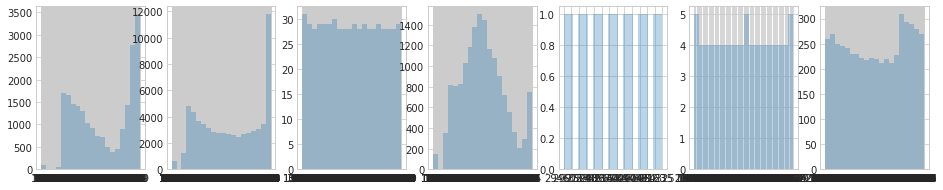

interest_factor


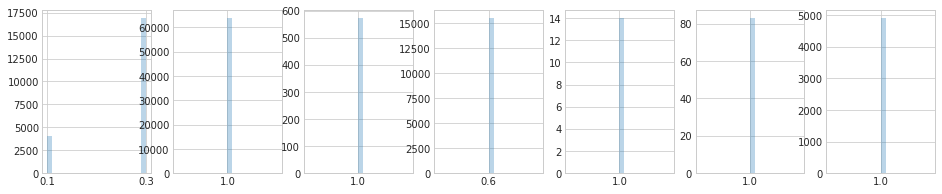

In [9]:

tracks_results = tracks_results.reset_index()
for cluster in sorted(set(kmeans.labels_)):
    print(collections.Counter(tracks_results[tracks_results['cluster']==cluster]['track_year_created']).most_common(5))

n_clusters = len(set(kmeans.labels_))
for col in X_columns:
    print(col)
    i = 1
    plt.figure(figsize=(16,3))
    for cluster in sorted(set(kmeans.labels_)):
        plt.subplot(1, n_clusters, i)
#        plt.xlim([0,tracks_results[col].max()])
        plt.hist(tracks_results[tracks_results['cluster']==cluster][col], label=str(cluster), alpha=0.3, bins=20)
        i += 1
    plt.show()
